<img src="images/aaib.PNG" style="width:400px;height:250px;">

# About Today's Practice:

1. Content-Related: **Unsupervised ML Models: k-Means!**
\
&nbsp;
2. Customer Segmentation: Companies **divide customers into groups** with similar traits to market to each group. A business-to-business marketer may segment customers by industry, number of workers, risk level, CLV, etc.(https://www.shopify.com/blog/what-is-customer-segmentation#:~:text=Customer%20segmentation%20is%20the%20process,Number%20of%20employees)
\
&nbsp;
3. Clustering: It **divides the population or data points into groups** that are more similar than others. The goal is to cluster comparable groupings.
\
&nbsp;
4. k-Means: Unsupervised machine learning algorithms like **K-means** clustering are simple and popular. The dataset needs k centroids, which you'll define. A centroid is the cluster's center. Reducing the in-cluster sum of squares assigns each data point to a cluster. The **K-means algorithm finds k centroids and assigns each data point to the nearest cluster while keeping the centroids small.**
\
&nbsp;

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

**The dataset uses basic mall customer data (ID, age, gender, income, spending score) to determine the Spending Score.**

# Set-up

In [196]:
# Commonly used libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# For plotting
import plotly as py
import plotly.graph_objs as go

# From scikitlearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, OPTICS, HDBSCAN
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

# Data Exploration & Preprocessing

In [197]:
# loading dataset and chekcing its heads!
df = pd.read_csv('datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [198]:
# checking the columns names we have
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [199]:
# checking more informaiton about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [200]:
# some stats about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for missing values

In [201]:
# checking the total amount of missing values per column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

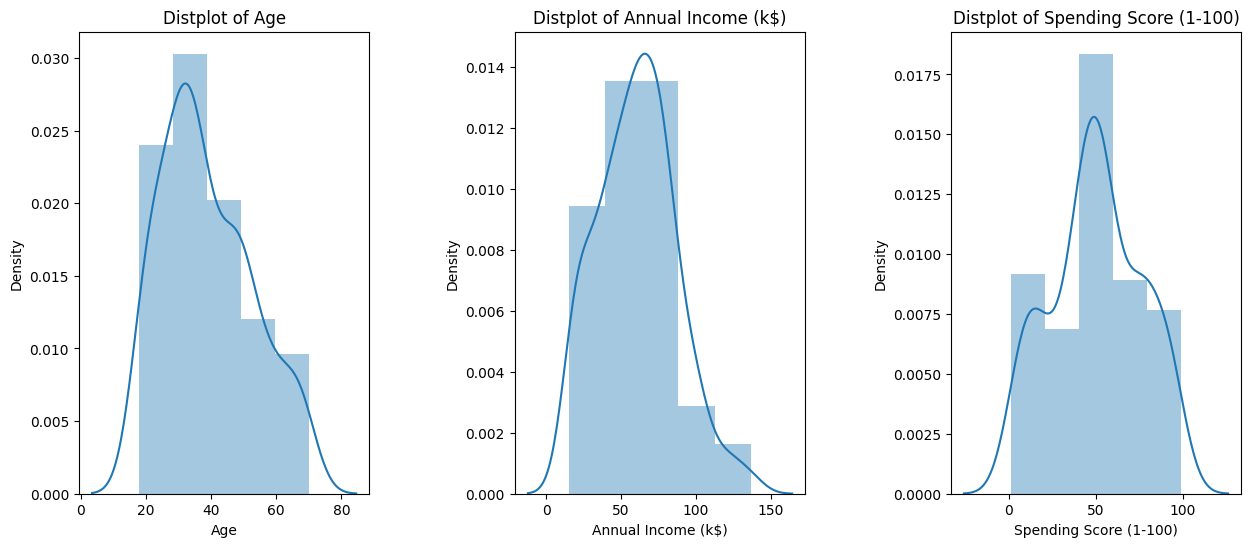

In [202]:
# ploting the histograms for the three numerical features we have and adding a density funciton over the histogram
# define figure size, number of bins and spacing between plots and bins

plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 5)
    plt.title('Distplot of {}'.format(x))
plt.show()

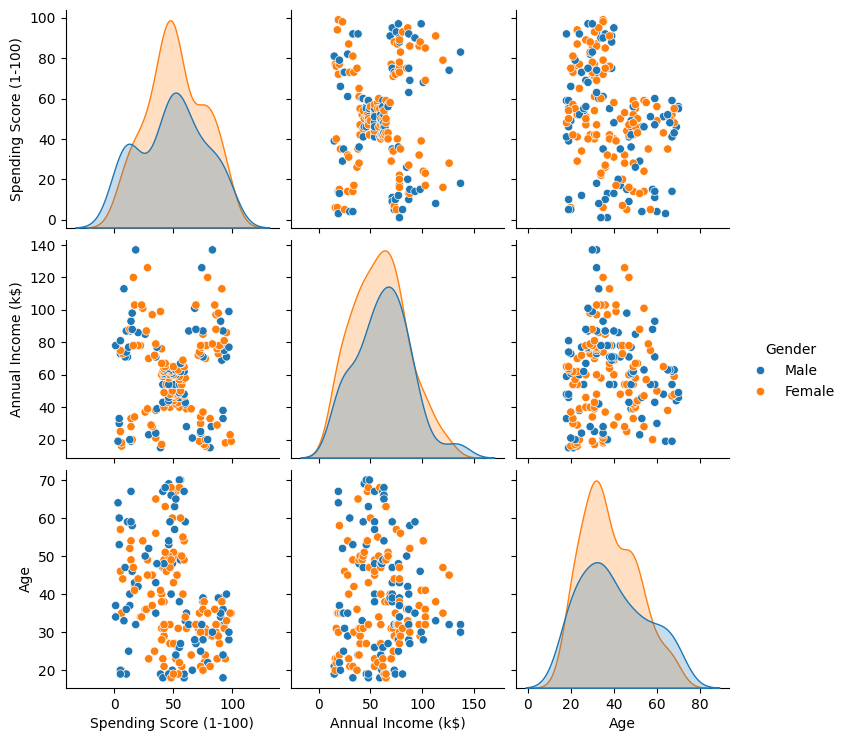

In [203]:
# pariplot to check relation between variables
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

In [204]:
# We will cluster based on 2 and 3 variables, we will check the scatter plot, and 
# Also check elbow method to support decision on selecting value for k

# Clustering Implementation

### A1. 2D Clustering based on Age and Spending Score

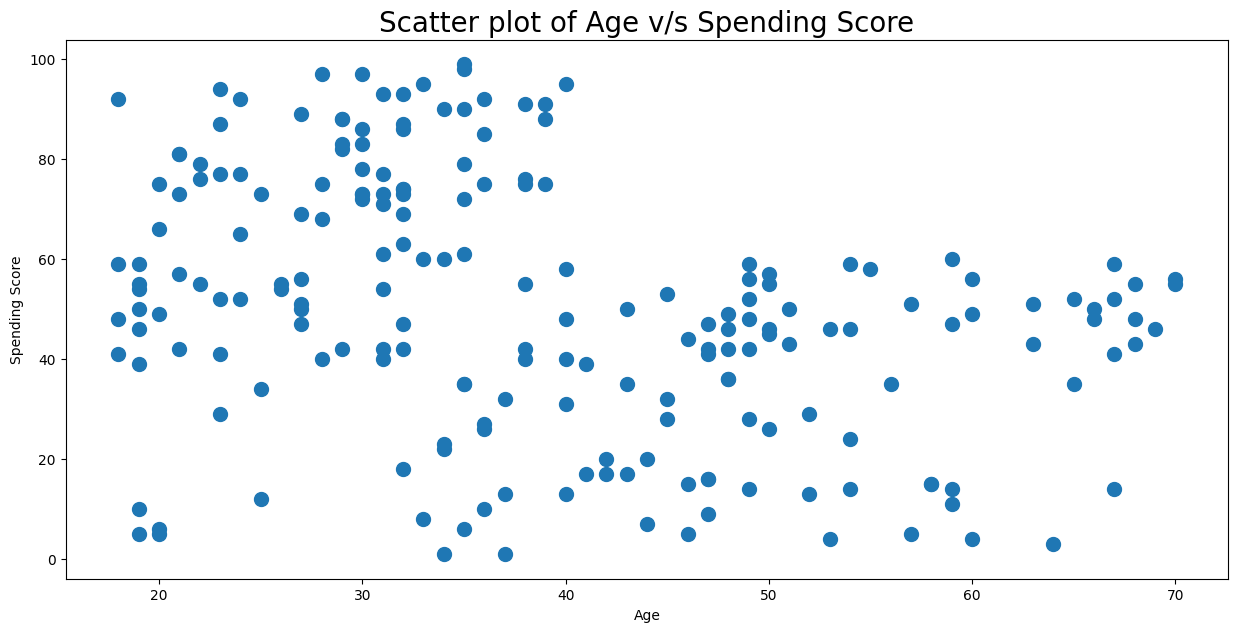

In [205]:
# This is just a scatter plot between the two variables selected in this case
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

### A2. Selecting value for k

In [206]:
# This is to generate the data (inertia per number of clusters)
# We do use k = 14 (max) and collect the inertia in each case
# We use k-means++ which is differrent from k-means random... Anyone know why?

X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

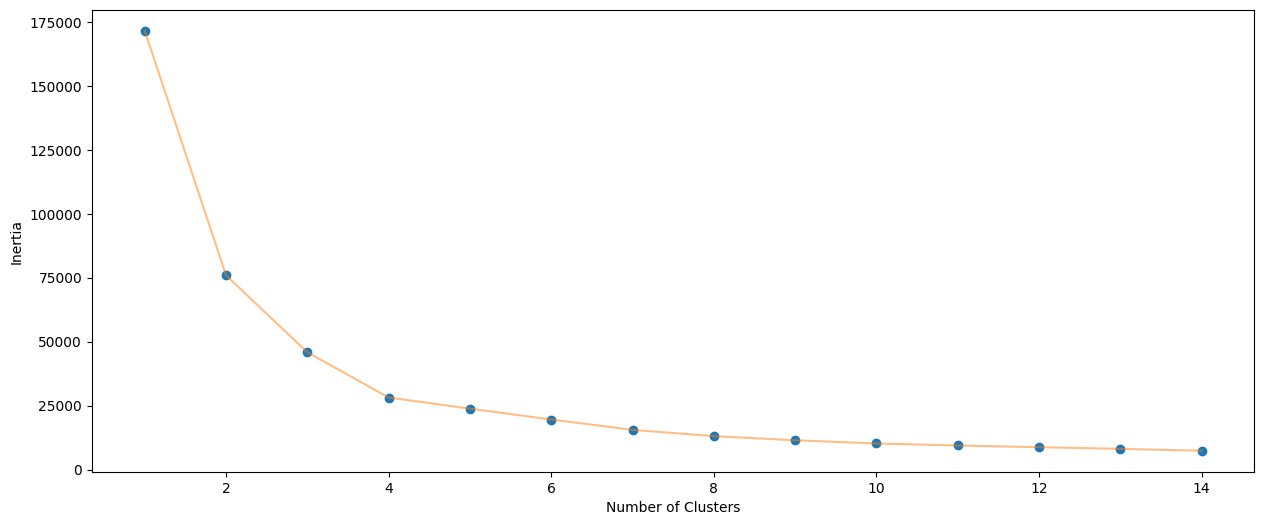

In [207]:
# This is just the elbow method plot
# We would like to select k for where the inertia does not descrease in the same ratio  (elbow of the plot)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1, 15) , inertia, 'o')
plt.plot(np.arange(1, 15) , inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### A3. Implementing with k=4

In [208]:
# This is setting up the algortihm for k=4, then fitting in the data (X1)

algorithm = (KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [209]:
# This is arranging infromaiton to be plotted in the graph below!

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

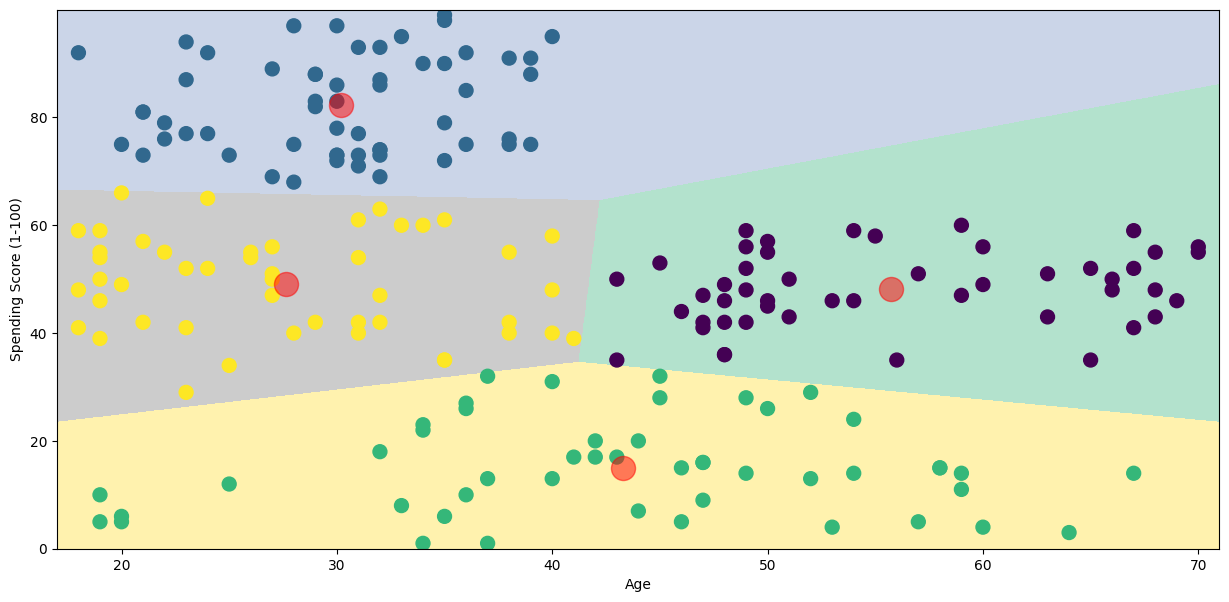

In [210]:
# This uses the set up above and built in with the centroids, and fitting from the algorithm...

plt.figure(1, figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

### A4. Implementing with k=5

In [211]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [212]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

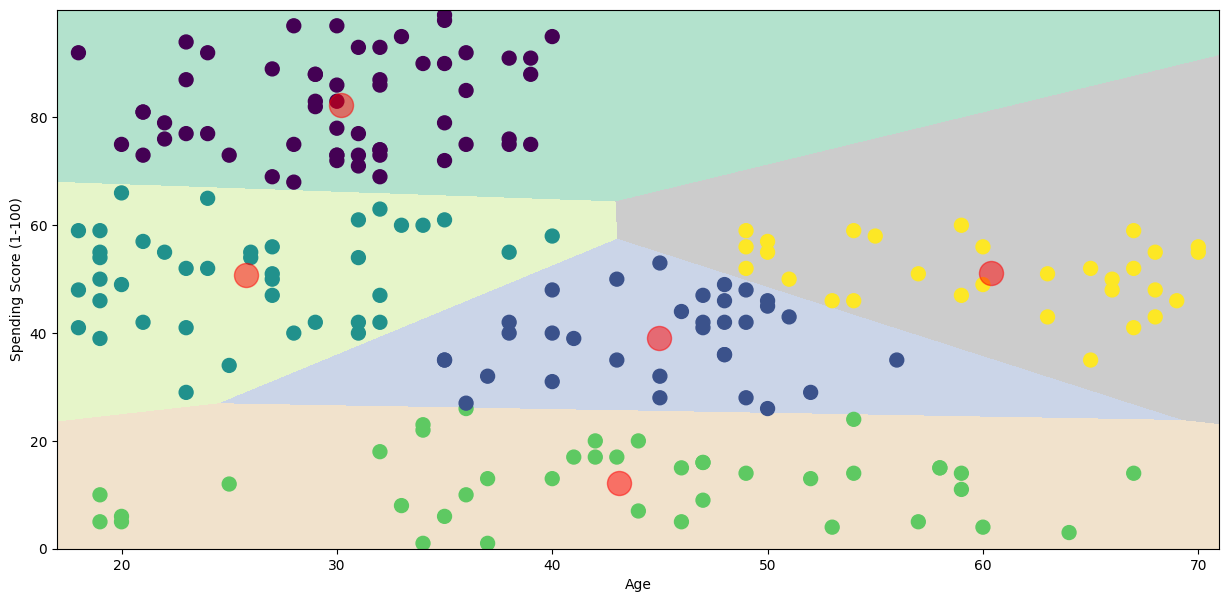

In [213]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### B1. 2D Clustering based on Annual Income and Spending Score

In [214]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

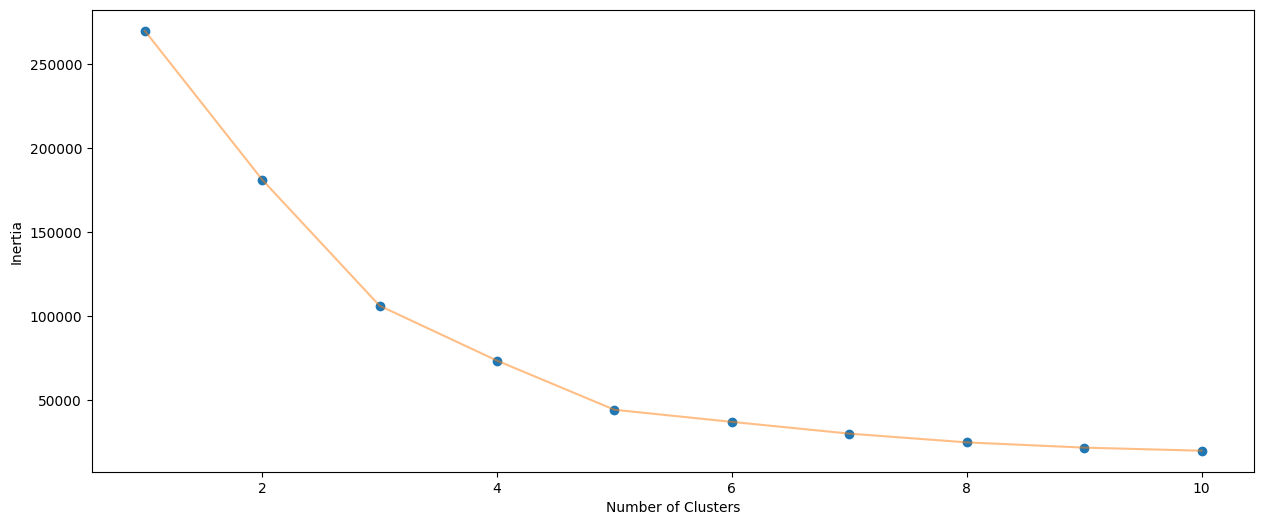

In [215]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### B2. Implementing with k=5

In [216]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [217]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1 
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])  

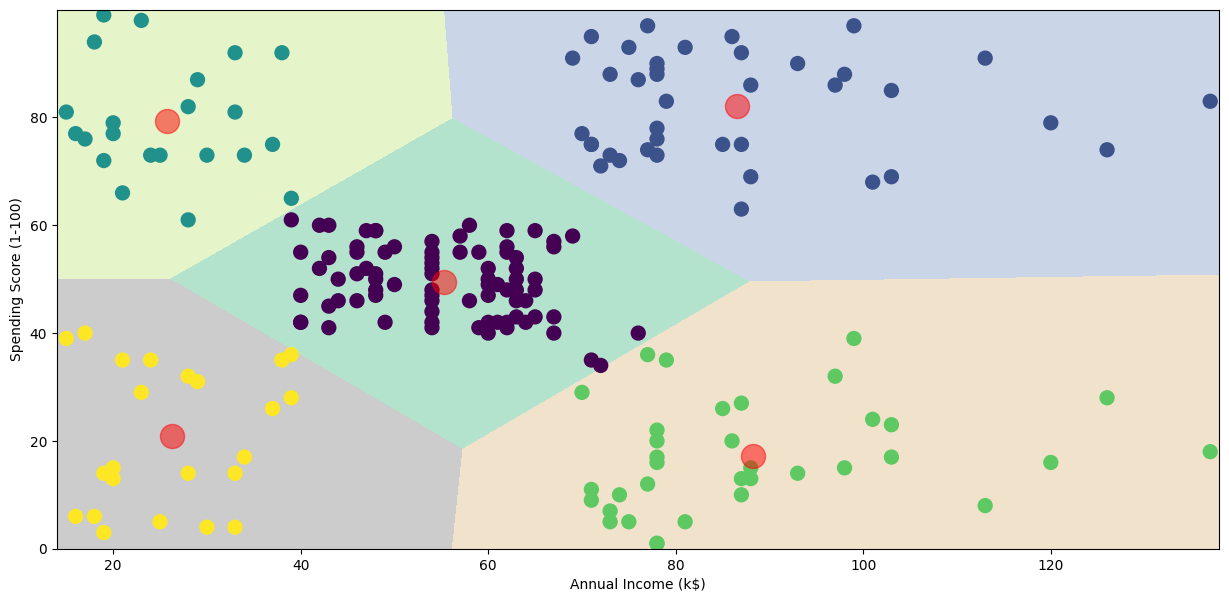

In [218]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 100)
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

### C1. 3D Clustering based on Age, Annual Income and Spending Score

In [219]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

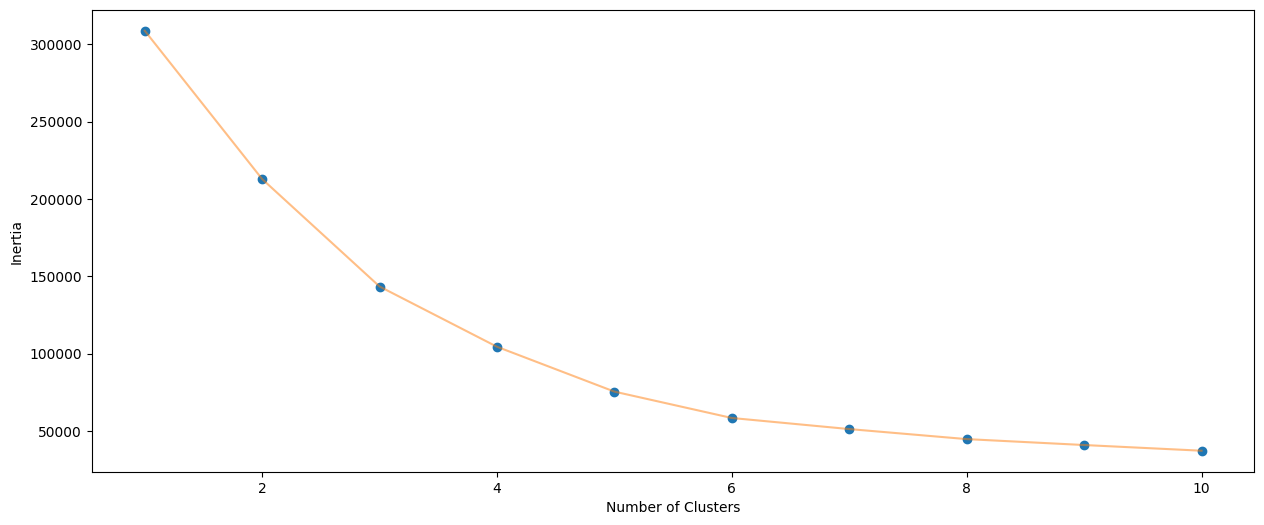

In [220]:
plt.figure(1 , figsize = (15, 6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### C2. Implementing with k=6

In [221]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit(X3)
df['cluster'] = pd.DataFrame(y_kmeans.labels_)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [222]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)

data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [223]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [224]:
df.to_csv("datasets/customers_segmented_final.csv", index = False)

In [225]:
def plot_and_fit(clf, name):
    clf.fit(X3)
    best_params = clf.best_params_
    algorithm.set_params(**best_params)
    y_pred = algorithm.fit_predict(X3)
    df['cluster'] = pd.DataFrame(y_pred)
    print(y_pred)
    unique_labels = np.unique(y_pred)
    if len(unique_labels) > 1:
        score = silhouette_score(X3, y_pred)  
        print(f"Silhouette Score for {name}: {score}")
    else:
        print(f"Silhouette Score for {name}: N/A (only one cluster)")

    trace1 = go.Scatter3d(
        x=df['Age'],
        y=df['Spending Score (1-100)'],
        z=df['Annual Income (k$)'],
        mode='markers',
        marker=dict(
            color=df['cluster'],
            size=10,
            line=dict(
                color=df['cluster'],
                width=12
            ),
            opacity=0.8
        )
    )
    
    layout = go.Layout(
        title=f'Clusters with {name}',
        scene=dict(
            xaxis=dict(title='Age'),
            yaxis=dict(title='Spending Score'),
            zaxis=dict(title='Annual Income')
        )
    )
    
    fig = go.Figure(data=[trace1], layout=layout)
    py.offline.iplot(fig)

In [226]:
param_grid = {
    'KMeans':{'n_clusters': [1,2,3, 5, 6 ,7]},
    'DBSCAN': {
        'eps': [0.1, 0.3, 0.5],
        'min_samples': [5, 10, 15]
    },
    'Hierarchical': {
        'n_clusters': [3, 5, 7],
        'linkage': ['ward', 'complete', 'average']
    },
    'BIRCH': {
        'threshold': [0.1, 0.5, 1.0],
        'branching_factor': [20, 50, 100]
    },
    'OPTICS': {
        'min_samples': [2, 5, 10, 15],
        'max_eps': [0.1, 0.5, 1.0]
    },
    'HDBSCAN': {
        'min_cluster_size': [10, 20, 30],
        'min_samples': [2,5, 10, 15]
    }
}

algorithms = [
    (KMeans(init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42),"KMeans"),
    (DBSCAN(), "DBSCAN"),
    (AgglomerativeClustering(), "Hierarchical"),
    (Birch(), "BIRCH"),
    (OPTICS(), "OPTICS"),
    (HDBSCAN(), "HDBSCAN")
]

In [227]:
for algorithm, name in algorithms:
    scorer = make_scorer(silhouette_score, greater_is_better=True)
    clf = GridSearchCV(algorithm, param_grid[name], scoring=scorer)
    plot_and_fit(clf, name)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette Score for KMeans: N/A (only one cluster)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Silhouette Score for DBSCAN: N/A (only one cluster)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Silhouette Score for Hierarchical: 0.38141795042544546


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Silhouette Score for BIRCH: 0.38141795042544546


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
Silhouette Score for OPTICS: N/A (only one cluster)


[-1  3 -1  3  2  3 -1 -1  2  3  2 -1  2  3 -1  3  2  3  2 -1  2  3  2  3
  2  3  2 -1  2  3  2  3  2  3  2  3  2  3  2  3 -1  3  5  4  5  4  5  4
  4  4  5  4  4  6  5  5  5  6  4  5  6  4  6  6  6  4  5  6  4  4  6  5
  6  6  6  4  5  5  4  5  6  5 -1  5  4  5  6  4  5  5 -1  4  5 -1 -1  4
  5  4  5  4  4  5 -1  4  5  4 -1  5 -1 -1 -1  4 -1  4  4  4 -1  5  5  5
  4 -1 -1  0 -1  0 -1  0  1  0  1  0 -1  0 -1  0  1  0 -1  0  1  0 -1  0
 -1  0 -1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1  0 -1  0  1  0  1  0
  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1  0  1  0  1  0
 -1  0 -1  0 -1  0 -1  0]
Silhouette Score for HDBSCAN: 0.2693005684259646


**3. SOURCE:**
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data